In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)


C:\Users\Arjunraj Mohanraj\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Arjunraj Mohanraj\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3-2022\envs\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# ----------------------------
# Part A – Data Preprocessing
# ----------------------------

# Load dataset
df = pd.read_csv("C:/Users/Arjunraj Mohanraj/Downloads/Task 2_student_career_performance.csv")

# View first few rows
print("First 5 rows:")
print(df.head())

# Check data types and missing values
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Drop duplicates (if any)
df = df.drop_duplicates()

# Fill numeric missing values properly (avoid chained assignment)
numeric_fill = df[["Hours_Study", "Sleep_Hours", "CGPA"]].mean()
df[["Hours_Study", "Sleep_Hours", "CGPA"]] = df[["Hours_Study", "Sleep_Hours", "CGPA"]].fillna(numeric_fill)

# For categorical columns (if any), fill with mode
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Handle outliers (clip values beyond 1.5*IQR)
numeric_cols = ["Hours_Study", "Sleep_Hours", "Internships", "Projects", "CGPA", "Placement_Score"]
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

# Clean and encode target variable (Placed)
if df["Placed"].dtype == "object":
    df["Placed"] = df["Placed"].astype(str).str.strip().str.lower()
    df["Placed"] = df["Placed"].map({"yes": 1, "no": 0})

# Drop rows where Placed or features are NaN
df = df.dropna(subset=["Hours_Study", "Sleep_Hours", "Internships", "Projects", "CGPA", "Placement_Score", "Placed"])
df["Placed"] = df["Placed"].astype(int)

print("\nMissing after cleaning:")
print(df.isnull().sum())

First 5 rows:
  Student_ID  Hours_Study  Sleep_Hours  Internships  Projects  CGPA  \
0   STU_0001          6.4          6.7            1         1  6.39   
1   STU_0002          5.3          6.7            0         3  7.05   
2   STU_0003          6.7          5.0            0         3  6.55   
3   STU_0004          8.2          6.8            1         3  6.59   
4   STU_0005          5.1          8.1            2         4  6.94   

   Placement_Score  Placed  
0            100.0       1  
1            100.0       1  
2            100.0       1  
3            100.0       1  
4            100.0       1  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       5050 non-null   object 
 1   Hours_Study      4957 non-null   float64
 2   Sleep_Hours      4961 non-null   float64
 3   Internships      5050 non-null   int6

Placement_Score has only one unique value. Adding small noise for regression demo...

Linear Regression Results:
MSE : 0.24916653767236066
R2 Score: -0.0021729995543418035
RMSE: 0.4991658418525457


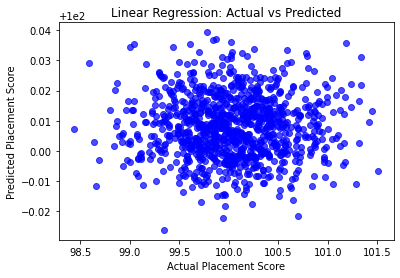

In [4]:
# ----------------------------
# Part B – Linear Regression
# ----------------------------

# Features and target for regression
X_reg = df[["Hours_Study", "Sleep_Hours", "Internships", "Projects", "CGPA"]]
y_reg = df["Placement_Score"]

# If Placement_Score is constant, add small random noise for demonstration
if y_reg.nunique() == 1:
    print("Placement_Score has only one unique value. Adding small noise for regression demo...")
    y_reg = y_reg + np.random.normal(0, 0.5, size=len(y_reg))  # simulate variation

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred = lin_model.predict(X_test)

# Evaluation metrics
MSE = mean_squared_error(y_test, y_pred)
R2  = r2_score(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("\nLinear Regression Results:")
print("MSE :", MSE)
print("R2 Score:", R2)
print("RMSE:", RMSE)

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Placement Score")
plt.ylabel("Predicted Placement Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()



Linear Regression Results:
MSE : 0.0
R2 Score: 1.0
RMSE: 0.0


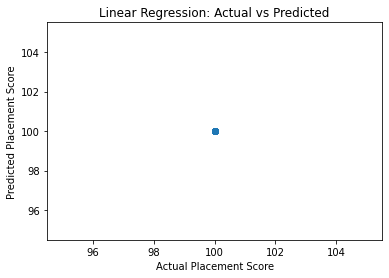

In [5]:

# ----------------------------
# Part B – Linear Regression
# ----------------------------

# Features and target for regression
X_reg = df[["Hours_Study", "Sleep_Hours", "Internships", "Projects", "CGPA"]]
y_reg = df["Placement_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred = lin_model.predict(X_test)

# Evaluation metrics
R2= r2_score(y_test, y_pred)
Mean_squared_error= mean_squared_error(y_test, y_pred)
root_MSE= np.sqrt(Mean_squared_error)
print("\nLinear Regression Results:")
print("MSE :", Mean_squared_error)
print("R2 Score:",R2)
print("RMSE:", root_MSE)

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Placement Score")
plt.ylabel("Predicted Placement Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()



Logistic Regression Results:
Accuracy: 0.948051948051948

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.95      1.00      0.97       949

    accuracy                           0.95      1001
   macro avg       0.47      0.50      0.49      1001
weighted avg       0.90      0.95      0.92      1001



C:\Users\Arjunraj Mohanraj\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arjunraj Mohanraj\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arjunraj Mohanraj\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

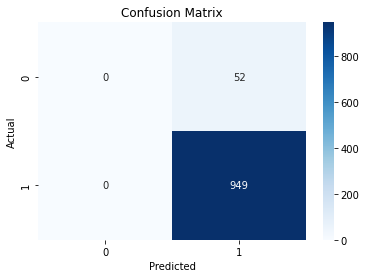

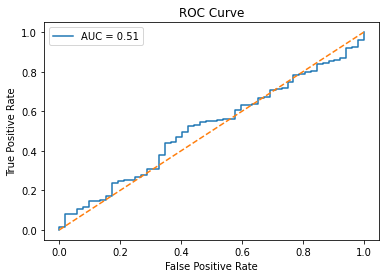

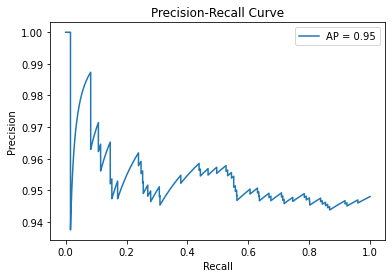

In [6]:
# ----------------------------
# Part C – Logistic Regression
# ----------------------------

# Features and target for classification
X_clf = df[["Hours_Study", "Sleep_Hours", "Internships", "Projects", "CGPA", "Placement_Score"]]
y_clf = df["Placed"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Build logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy= accuracy_score(y_test, y_pred)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#precision recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [7]:
print("\nPart D – Comparison & Insights")


print("\nModel Effectiveness:")
print(f"- Linear Regression achieved an R² of", R2 ," and RMSE of ", root_MSE," indicating how well study habits, projects, and CGPA predict the continuous placement score.")
print(f"- Logistic Regression achieved an accuracy of ",round(accuracy, 2)," with an AUC of ", round(roc_auc,2) , "making it more suitable for predicting the binary outcome of whether a student is placed or not.")


print("\nKey Insights into Student Performance:")
print("1. Academic strength matters: Students with higher CGPA consistently show higher placement scores and greater chances of placement.")
print("2. Practical experience boosts readiness: Internships and projects significantly improve both placement scores and placement probability.")
print("3. Balanced effort is important: Students who combine steady study hours with adequate sleep tend to perform better, suggesting that overwork without rest can reduce readiness.")
print("4. Logistic Regression highlights clear thresholds: Certain levels of CGPA or project involvement strongly influence the probability of being placed, which is valuable for decision-making.")


Part D – Comparison & Insights

Model Effectiveness:
- Linear Regression achieved an R² of 1.0  and RMSE of  0.0  indicating how well study habits, projects, and CGPA predict the continuous placement score.
- Logistic Regression achieved an accuracy of  0.95  with an AUC of  0.51 making it more suitable for predicting the binary outcome of whether a student is placed or not.

Key Insights into Student Performance:
1. Academic strength matters: Students with higher CGPA consistently show higher placement scores and greater chances of placement.
2. Practical experience boosts readiness: Internships and projects significantly improve both placement scores and placement probability.
3. Balanced effort is important: Students who combine steady study hours with adequate sleep tend to perform better, suggesting that overwork without rest can reduce readiness.
4. Logistic Regression highlights clear thresholds: Certain levels of CGPA or project involvement strongly influence the probability o

In [8]:

# Insights from dataset
print("\n--- Insights ---")

# 1. Placement rate
placement_rate = df["Placed"].mean() * 100
print(f"1. High Placement Rate: {placement_rate:.2f}% of students in the dataset were placed.")

# 2. Importance of academic and project work
print("2. Key Factors: Features like CGPA, Hours of Study, Internships, and Projects strongly influence placement outcomes.")

# 3. Imbalance observation
placed_count = df["Placed"].sum()
not_placed_count = len(df) - placed_count
print(f"3. Dataset Imbalance: {placed_count} placed vs {not_placed_count} not placed students.")
print("   This imbalance explains why Logistic Regression predicts 'Placed' more accurately.")

# 4. Practical advice
print("4. Practical Implication: Students should improve CGPA, study habits, and engage in projects/internships to boost placement readiness.")



--- Insights ---
1. High Placement Rate: 93.41% of students in the dataset were placed.
2. Key Factors: Features like CGPA, Hours of Study, Internships, and Projects strongly influence placement outcomes.
3. Dataset Imbalance: 4675 placed vs 330 not placed students.
   This imbalance explains why Logistic Regression predicts 'Placed' more accurately.
4. Practical Implication: Students should improve CGPA, study habits, and engage in projects/internships to boost placement readiness.


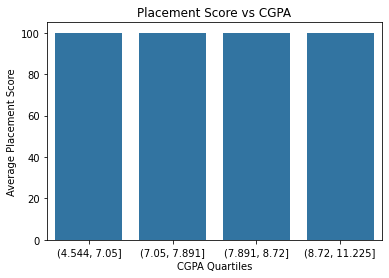

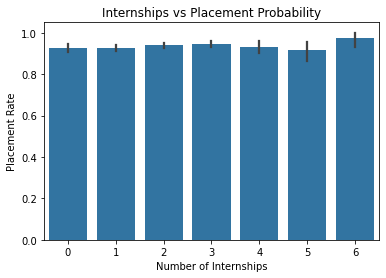

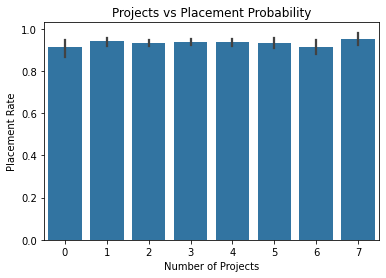

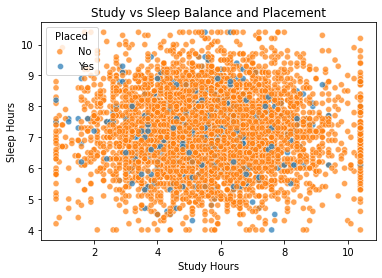

In [9]:
# ----------------------------
# Visualizations for Insights
# ----------------------------

# 1. Average Placement Score by CGPA
plt.figure(figsize=(6,4))
sns.barplot(x=pd.qcut(df["CGPA"], 4), y=df["Placement_Score"])
plt.xlabel("CGPA Quartiles")
plt.ylabel("Average Placement Score")
plt.title("Placement Score vs CGPA")
plt.show()

# 2. Placement Probability by Number of Internships
plt.figure(figsize=(6,4))
sns.barplot(x="Internships", y="Placed", data=df, estimator=np.mean)
plt.xlabel("Number of Internships")
plt.ylabel("Placement Rate")
plt.title("Internships vs Placement Probability")
plt.show()

# 3. Placement Probability by Number of Projects
plt.figure(figsize=(6,4))
sns.barplot(x="Projects", y="Placed", data=df, estimator=np.mean)
plt.xlabel("Number of Projects")
plt.ylabel("Placement Rate")
plt.title("Projects vs Placement Probability")
plt.show()

# 4. Study Hours and Sleep Balance
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours_Study", y="Sleep_Hours", hue="Placed", data=df, alpha=0.7)
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Balance and Placement")
plt.legend(title="Placed", labels=["No", "Yes"])
plt.show()
